# Resultados de Laboratorio

1. Importar resultados. Preparación de data.
2. Definir una función para representar los resultados en gráficas.
3. Presentar los resultados.

In [12]:
import os
import sys
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from matplotlib import colors

Datasets:


## Importar resultados

In [13]:
def import_file(basePath, filename):
    file = basePath + '/' + filename

    data_import = {}
    with open(file) as json_file:
        data_import = json.load(json_file)

    return data_import

def return_colors(algorithms=[]):
    colors = {
        'rr-bfs-truncated': "#0000FF",
        'even-gazit': "#808000",
        'quinca': "#FFFF00",
        'abm': "#FF0000",
        'forest': "#008080"
    }
    colors_return = []
    if algorithms:
        for al in algorithms:
            colors_return.append(colors[al])
    else:
        for c in colors:
            colors_return.append(colors[c])
    
    return colors


def read_files(basePath='../lab/results_csv'):
    files = []

    for f in os.listdir(basePath):
        if os.path.isfile(os.path.join(basePath, f)) and f.endswith(".csv"):
            files.append(f)

    data_to_plot = pd.DataFrame()

    for filename in files:
        data_import = pd.read_csv(basePath + "/" + filename) 
        
        data_to_plot = pd.concat([data_to_plot, data_import])
    
    data_to_plot['density'] = round(data_to_plot['density'], 2)
    
    return data_to_plot

## Definir script para gráficas

In [14]:
def algorithms_faster(data, fasterNum=3):
    dd = data.groupby('algorithm')['time'].mean().to_frame().sort_values(by=['time'])
    return dd.index.tolist()[:fasterNum]

In [15]:
def draw_plot_seaborn_bar_simple2(data, nodes, type_incre):
    data_filter = data.loc[ (data['nodes'] == nodes) & (data['type'] == type_incre)]
    width = 0.85

    data_filter0_1 = data_filter.loc[data_filter['density'] == 0.01]
    data_filter0_1_g = data_filter0_1.groupby('algorithm')['time'].mean().to_frame()

    data_filter0_2 = data_filter.loc[data_filter['density'] == 0.02]
    data_filter0_2_g = data_filter0_2.groupby('algorithm')['time'].mean().to_frame()

    data_filter0_3 = data_filter.loc[data_filter['density'] == 0.03]
    data_filter0_3_g = data_filter0_3.groupby('algorithm')['time'].mean().to_frame()

    data_filter0_4 = data_filter.loc[data_filter['density'] == 0.04]
    data_filter0_4_g = data_filter0_4.groupby('algorithm')['time'].mean().to_frame()

    data_filter0_5 = data_filter.loc[data_filter['density'] == 0.05]
    data_filter0_5_g = data_filter0_5.groupby('algorithm')['time'].mean().to_frame()


    list0_1 = data_filter0_1_g['time'].to_list(),
    list0_2 = data_filter0_2_g['time'].to_list(),
    list0_3 = data_filter0_3_g['time'].to_list(),
    list0_4 = data_filter0_4_g['time'].to_list(),
    list0_5 = data_filter0_5_g['time'].to_list(),

    fig, ax = plt.subplots()

    xLabels = data_filter0_1_g.index.to_list()

    ax.bar(xLabels, list0_1[0], width, label='0.01')
    ax.bar(xLabels, list0_2[0], width,  label='0.02')
    ax.bar(xLabels, list0_3[0], width,  label='0.03')
    ax.bar(xLabels, list0_4[0], width,  label='0.04')
    ax.bar(xLabels, list0_5[0], width,  label='0.05')

    ax.set_ylabel('Times')
    ax.legend()

    plt.show()

In [16]:
def draw_plot_seaborn_bar(
    data,
    faster=False,
    densityGroup=True,
    densityValues=[],
    fasterNum=3,
    type_fig='all_algorithms',
    num_nodes=100,
    type_incremental='insert_edge',
    limit=[]
):
    width = 0.85
    colors_g = sns.xkcd_palette(['windows blue', 'amber', 'greyish',  'faded green', 'dusty purple'])
    #colors_g = [(0.21568627450980393, 0.47058823529411764, 0.7490196078431373), '#fb5607', '#8a5a44', '#8338ec', '#edc4b3']

    if not faster:
        blabla = data.groupby('density')['time'].mean().to_frame()
        #print(data.loc[(data['density'] == 0.01) & (data['algorithm'] == 'abm')])
        print(blabla)
        
        if densityValues:
                data = data.loc[data['density'].isin(densityValues)]

        if densityGroup:
            ax = sns.barplot(y='algorithm', x='time', data=data, hue="density", capsize=.2, palette=return_colors())
            ax.set(xlabel='Time (Miliseconds)', ylabel='Algorithm')

            #plt.hist([data['time'],data['algorithm'], bins=100, stacked=True,normed=True)
        else:
            if len(limit) == 0:
                #sns.barplot(y='algorithm', x='time', data=data, capsize=.2, palette=return_colors())
                
                fig, ax = plt.subplots()
                data_gg = data.groupby('algorithm')['time'].mean().to_frame()
                
                densitySorted = sorted(densityValues)
                
                for index_d in range(len(densityValues)):
                    xLabels = data_gg.index.to_list()
                    density = densityValues[index_d]
                    
                    indexForColor = densitySorted.index(densityValues[index_d])
                    color = colors_g[indexForColor]

                    data_filtered = data.loc[data['density'] == density]
                    data_filtered_g = data_filtered.groupby('algorithm')['time'].mean().to_frame()
                    listed = data_filtered_g['time'].to_list()
                    #listed, xLabels = [ list(tuple) for tuple in  zip(*sorted(zip(listed, xLabels), reverse=True))]

                    ax.bar(xLabels, listed, width, label=str(density), color=color)

                ax.set_ylabel('Times')
                ax.legend()
                
            else:
                fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                             figsize=(5,6))
                ax1.spines['bottom'].set_visible(False)
                ax1.tick_params(axis='x',which='both',bottom=False)
                ax2.spines['top'].set_visible(False)

                ax2.set_ylim(0, limit[0])
                ax1.set_ylim(limit[1],limit[2])
                #ax1.set_yticks(np.arange(limit[1], limit[2], 0.5))

                data_gg = data.groupby('algorithm')['time'].mean().to_frame()
                
                densitySorted = sorted(densityValues)
                
                for index_d in range(len(densityValues)):
                    xLabels = data_gg.index.to_list()
                    density = densityValues[index_d]
                    
                    indexForColor = densitySorted.index(densityValues[index_d])
                    color = colors_g[indexForColor]


                    data_filtered = data.loc[data['density'] == density]
                    data_filtered_g = data_filtered.groupby('algorithm')['time'].mean().to_frame()
                    listed = data_filtered_g['time'].to_list()
                    #listed, xLabels = [ list(tuple) for tuple in  zip(*sorted(zip(listed, xLabels), reverse=True))]

                    #ax.barh(xLabels, listed, width, label=str(density), color=color)
                    bars1 = ax1.bar(xLabels, listed, width, label=str(density), color=color)
                    bars2 = ax2.bar(xLabels, listed, width, label=str(density), color=color)

                    for tick in ax2.get_xticklabels():
                        tick.set_rotation(0)
                    d = .015  
                    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
                    ax1.plot((-d, +d), (-d, +d), **kwargs)      
                    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
                    kwargs.update(transform=ax2.transAxes)  
                    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
                    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

                    for b1, b2 in zip(bars1, bars2):
                        posx = b2.get_x() + b2.get_width()/2.
                        if b2.get_height() > limit[0]:
                            ax2.plot((posx-3*d, posx+3*d), (1 - d, 1 + d), color='k', clip_on=False,
                                     transform=ax2.get_xaxis_transform())
                        if b1.get_height() > limit[1]:
                            ax1.plot((posx-3*d, posx+3*d), (- d, + d), color='k', clip_on=False,
                                     transform=ax1.get_xaxis_transform())

                ax1.set_ylabel('Times (Miliseconds)')
                ax1.legend()
                plt.xticks(rotation=45)
            
    else:
        if densityValues:
            data = data.loc[data['density'].isin(densityValues)]
        faster_al = algorithms_faster(data, fasterNum=fasterNum)
        data_filter = data.loc[data['algorithm'].isin(faster_al)]



        if densityGroup:
            if densityValues:
                data_filter = data_filter.loc[data_filter['density'].isin(densityValues)]
            ax = sns.barplot(y='time', x='density', data=data_filter, hue="algorithm", capsize=.2, palette=return_colors())
            ax.set(xlabel='Edge Density', ylabel='Time (Miliseconds)')
        else:
            ax = sns.barplot(y='algorithm', x='time', data=data_filter, capsize=.2, palette=return_colors())
            ax.set(xlabel='Algorithms', ylabel='Time (Miliseconds)')

    #Export to file
    if True:
        path = '../lab/figs/nodes_' + str(num_nodes) + '/' + type_incremental + '/'
        filename = type_fig

        if densityValues:
            last_index = len(densityValues)-1
            filename += "_" + str(densityValues[0]) + "_" + str(densityValues[last_index])
        plt.tight_layout()
        plt.savefig(path + filename + '.png', dpi=150)

    plt.show()
    #draw_plot_seaborn_bar_simple(data_filter_one_calc)
    

# Draw 3 plot diffetent
def draw_all_plot(
    data, 
    num_nodes, 
    type_incremental, 
    withGroup=True, 
    densityValues=[], 
    fasterNum=0, 
    generating=1,
    limit=[]
):
    data_filter = data.loc[ (data['nodes'] == num_nodes) & (data['type'] == type_incremental)]

    data_filter_one_calc = data_filter.groupby('algorithm')['time'].mean().to_frame()
    data_filter_one_calc['algorithm'] = data_filter_one_calc.index.values

    type_fig='all_algorithms'
    if generating == 2:
        type_fig='all_algorithms_generate_many'

    #PLOT
    draw_plot_seaborn_bar(
        data_filter,
        faster=True if fasterNum > 0 else False,
        densityGroup=False,
        fasterNum=fasterNum,
        densityValues=densityValues,
        type_fig=type_fig,
        num_nodes=num_nodes,
        type_incremental=type_incremental,
        limit=limit
    )

# Draw Group Density
def draw_group_plot(data, num_nodes, type_incremental, densityValues=[], fasterNum=3, generating=1):
    data_filter = data.loc[ (data['nodes'] == num_nodes) & (data['type'] == type_incremental)]

    data_filter_one_calc = data_filter.groupby('algorithm')['time'].mean().to_frame()
    data_filter_one_calc['algorithm'] = data_filter_one_calc.index.values

    type_fig='faster_algorithms_by_density'
    if generating == 2:
        type_fig='faster_algorithms_by_density_generate_many'

    draw_plot_seaborn_bar(
        data_filter,
        faster=True,
        densityGroup=True,
        densityValues=densityValues,
        fasterNum=fasterNum,
        type_fig=type_fig,
        num_nodes=num_nodes,
        type_incremental=type_incremental
    )


             time
density          
0.01     1.927981
0.02     2.354356
0.03     3.561163
0.04     2.408837
0.05     2.636595
0.10     2.691363
0.20     3.420091
0.29     2.615641
0.41     2.260575
0.50     2.817532


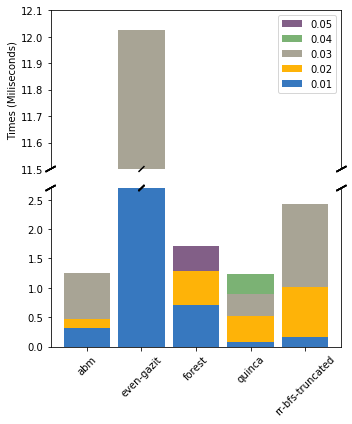

             time
density          
0.01     1.927981
0.02     2.354356
0.03     3.561163
0.04     2.408837
0.05     2.636595
0.10     2.691363
0.20     3.420091
0.29     2.615641
0.41     2.260575
0.50     2.817532


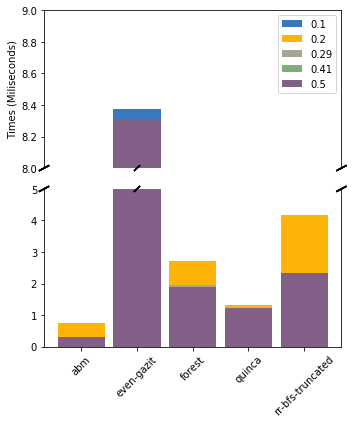

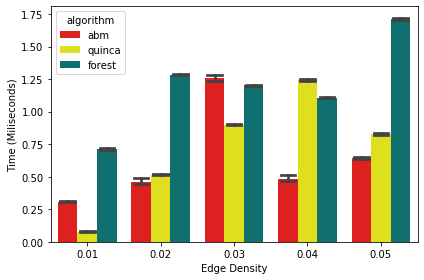

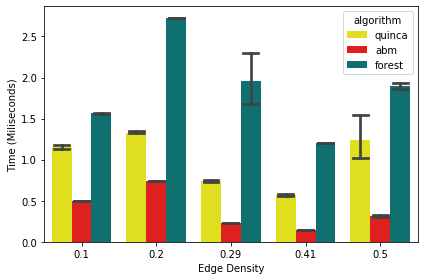

In [7]:
data = read_files()

draw_all_plot(data, 100, 'insert_edge', densityValues=[0.05, 0.04, 0.03, 0.02, 0.01], limit=[2.7, 11.5, 12.1])
draw_all_plot(data, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5], limit=[5, 8, 9])
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

# *RESULTADOS*

Load file from folder:

In [7]:
data = read_files()

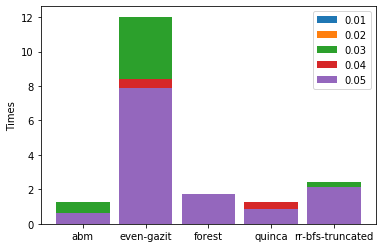

In [8]:
draw_plot_seaborn_bar_simple2(data, 100, 'insert_edge')

# Insert Random Edge (100 nodes)

   algorithm      time  nodes  edges  density         type
0        abm  0.357866    100    107     0.01  insert_edge
1        abm  0.305414    100    107     0.01  insert_edge
2        abm  0.309229    100    107     0.01  insert_edge
3        abm  0.306845    100    107     0.01  insert_edge
4        abm  0.306606    100    107     0.01  insert_edge
5        abm  0.302076    100    107     0.01  insert_edge
6        abm  0.304222    100    107     0.01  insert_edge
7        abm  0.303030    100    107     0.01  insert_edge
8        abm  0.303507    100    107     0.01  insert_edge
9        abm  0.313044    100    107     0.01  insert_edge
10       abm  0.306368    100    107     0.01  insert_edge
11       abm  0.304937    100    107     0.01  insert_edge
12       abm  0.308514    100    107     0.01  insert_edge
13       abm  0.306368    100    107     0.01  insert_edge
14       abm  0.304699    100    107     0.01  insert_edge
15       abm  0.307798    100    107     0.01  insert_ed

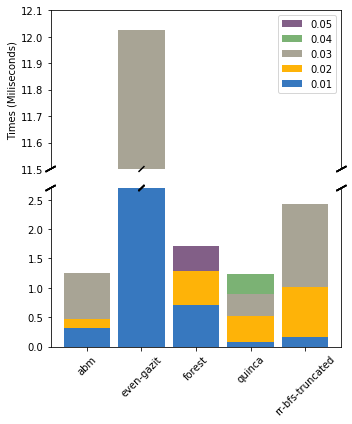

In [9]:
draw_all_plot(data, 100, 'insert_edge', densityValues=[0.05, 0.04, 0.03, 0.02, 0.01], limit=[2.7, 11.5, 12.1])

   algorithm      time  nodes  edges  density         type
0        abm  0.357866    100    107     0.01  insert_edge
1        abm  0.305414    100    107     0.01  insert_edge
2        abm  0.309229    100    107     0.01  insert_edge
3        abm  0.306845    100    107     0.01  insert_edge
4        abm  0.306606    100    107     0.01  insert_edge
5        abm  0.302076    100    107     0.01  insert_edge
6        abm  0.304222    100    107     0.01  insert_edge
7        abm  0.303030    100    107     0.01  insert_edge
8        abm  0.303507    100    107     0.01  insert_edge
9        abm  0.313044    100    107     0.01  insert_edge
10       abm  0.306368    100    107     0.01  insert_edge
11       abm  0.304937    100    107     0.01  insert_edge
12       abm  0.308514    100    107     0.01  insert_edge
13       abm  0.306368    100    107     0.01  insert_edge
14       abm  0.304699    100    107     0.01  insert_edge
15       abm  0.307798    100    107     0.01  insert_ed

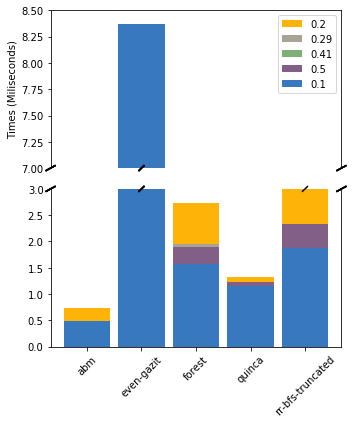

In [10]:
draw_all_plot(data, 100, 'insert_edge', densityValues=[0.2, 0.29, 0.41, 0.5,0.1], limit=[3, 7, 8.5])

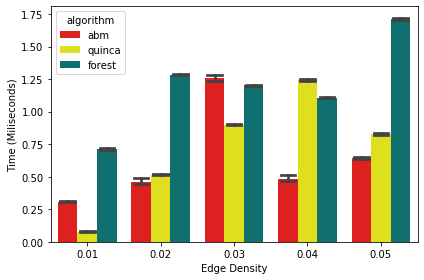

In [11]:
data = read_files()
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

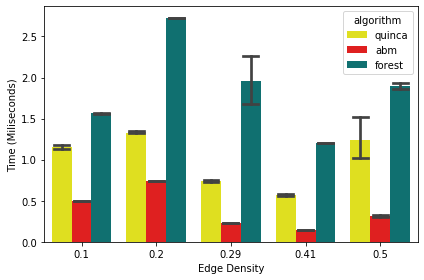

In [12]:
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

# Insert Random Edge (1.000 nodes)

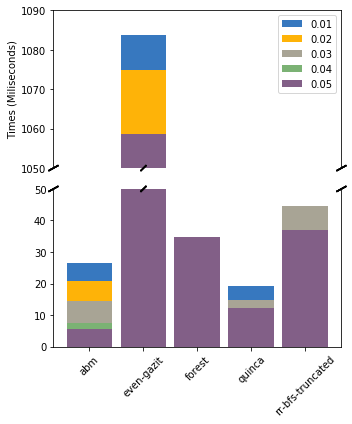

In [87]:
draw_all_plot(data, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], limit=[50, 1050, 1090])

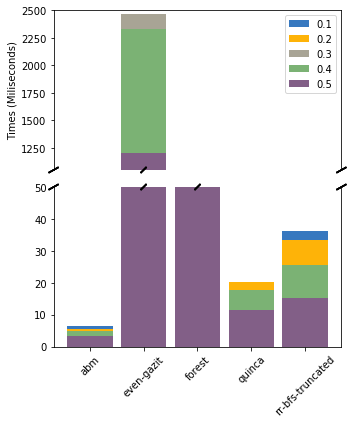

In [93]:
draw_all_plot(data, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], limit=[50, 1050, 2500])

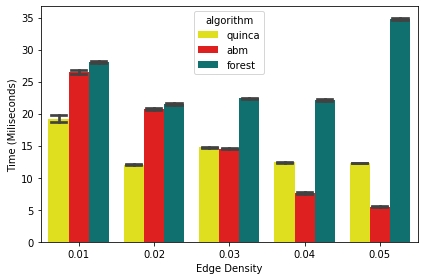

In [15]:
draw_group_plot(data, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

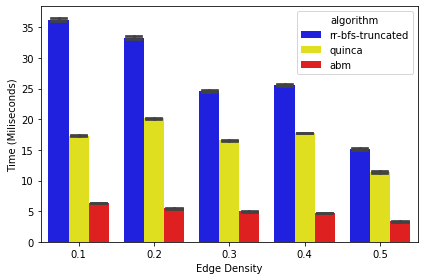

In [16]:
draw_group_plot(data, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Random Edge (2.000 nodes)

                time
density             
0.01      870.557694
0.02      781.081031
0.03     1082.798088
0.04      721.118412
0.05     1528.573531
0.10      994.970527
0.20     1031.034667
0.30      999.374483
0.40      968.316833
0.50      969.194471


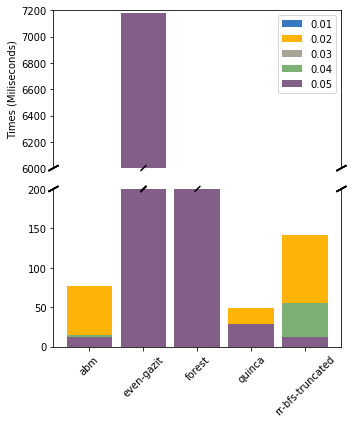

In [135]:
draw_all_plot(data, 2000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], limit=[200, 6000, 7200])

                time
density             
0.01      870.557694
0.02      781.081031
0.03     1082.798088
0.04      721.118412
0.05     1528.573531
0.10      994.970527
0.20     1031.034667
0.30      999.374483
0.40      968.316833
0.50      969.194471


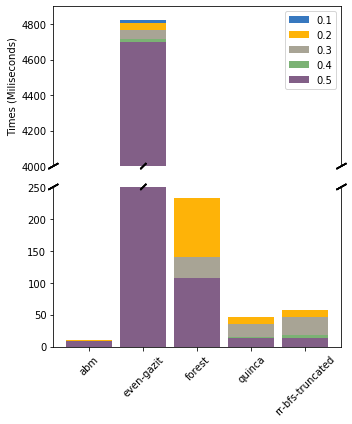

In [139]:
draw_all_plot(data, 2000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], limit=[250, 4000, 4900])

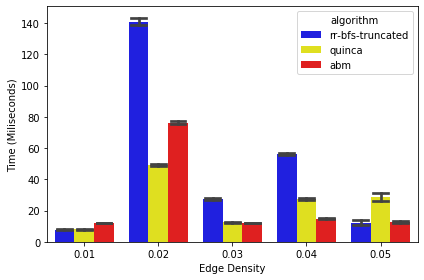

In [19]:
draw_group_plot(data, 2000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

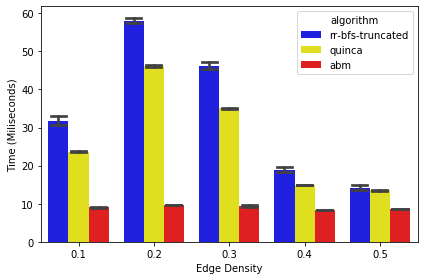

In [20]:
draw_group_plot(data, 2000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Worst Edge (100 nodes)

   algorithm      time  nodes  edges  density               type
0        abm  0.818491    100     88     0.01  insert_worst_edge
1        abm  0.765800    100     88     0.01  insert_worst_edge
2        abm  0.732422    100     88     0.01  insert_worst_edge
3        abm  0.723124    100     88     0.01  insert_worst_edge
4        abm  0.695467    100     88     0.01  insert_worst_edge
5        abm  0.702620    100     88     0.01  insert_worst_edge
6        abm  0.694513    100     88     0.01  insert_worst_edge
7        abm  0.688314    100     88     0.01  insert_worst_edge
8        abm  0.993967    100     88     0.01  insert_worst_edge
9        abm  1.033306    100     88     0.01  insert_worst_edge
10       abm  0.707388    100     88     0.01  insert_worst_edge
11       abm  0.692606    100     88     0.01  insert_worst_edge
12       abm  0.705242    100     88     0.01  insert_worst_edge
13       abm  0.705481    100     88     0.01  insert_worst_edge
14       abm  0.705957   

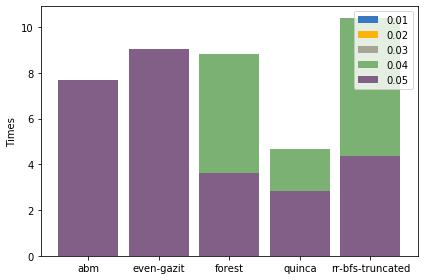

In [21]:
draw_all_plot(data, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

   algorithm      time  nodes  edges  density               type
0        abm  0.818491    100     88     0.01  insert_worst_edge
1        abm  0.765800    100     88     0.01  insert_worst_edge
2        abm  0.732422    100     88     0.01  insert_worst_edge
3        abm  0.723124    100     88     0.01  insert_worst_edge
4        abm  0.695467    100     88     0.01  insert_worst_edge
5        abm  0.702620    100     88     0.01  insert_worst_edge
6        abm  0.694513    100     88     0.01  insert_worst_edge
7        abm  0.688314    100     88     0.01  insert_worst_edge
8        abm  0.993967    100     88     0.01  insert_worst_edge
9        abm  1.033306    100     88     0.01  insert_worst_edge
10       abm  0.707388    100     88     0.01  insert_worst_edge
11       abm  0.692606    100     88     0.01  insert_worst_edge
12       abm  0.705242    100     88     0.01  insert_worst_edge
13       abm  0.705481    100     88     0.01  insert_worst_edge
14       abm  0.705957   

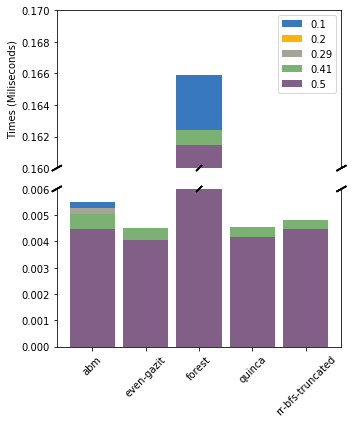

In [22]:
draw_all_plot(data, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.50], limit=[0.006, 0.16, 0.17])

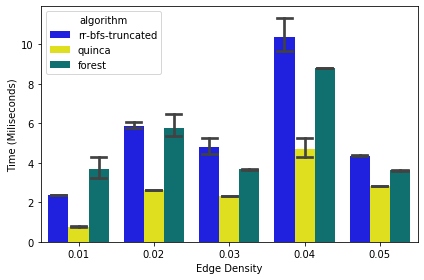

In [23]:
draw_group_plot(data, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

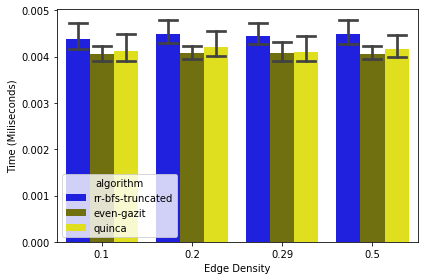

In [24]:
draw_group_plot(data, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.29, 0.39, 0.5])

# Insert Worst Edge (1.000 nodes)

    algorithm        time  nodes  edges  density               type
90        abm  648.242235   1000   9998     0.01  insert_worst_edge
91        abm  646.086931   1000   9998     0.01  insert_worst_edge
92        abm  677.752733   1000   9998     0.01  insert_worst_edge
93        abm  649.489164   1000   9998     0.01  insert_worst_edge
94        abm  651.988983   1000   9998     0.01  insert_worst_edge
95        abm  648.497820   1000   9998     0.01  insert_worst_edge
96        abm  654.487848   1000   9998     0.01  insert_worst_edge
97        abm  648.347378   1000   9998     0.01  insert_worst_edge
98        abm  666.012049   1000   9998     0.01  insert_worst_edge
99        abm  637.179136   1000   9998     0.01  insert_worst_edge
100       abm  634.466648   1000   9998     0.01  insert_worst_edge
101       abm  648.333073   1000   9998     0.01  insert_worst_edge
102       abm  672.208786   1000   9998     0.01  insert_worst_edge
103       abm  635.188580   1000   9998     0.01

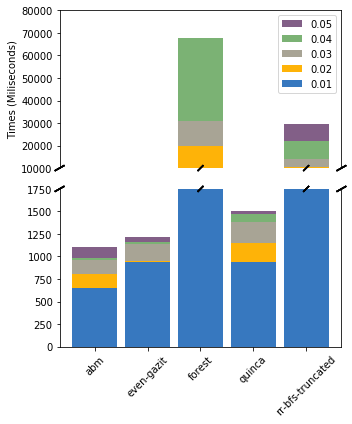

In [25]:
draw_all_plot(data, 1000, 'insert_worst_edge', densityValues=[0.05, 0.04, 0.03, 0.02, 0.01], limit=[1750, 10000, 80000])

    algorithm        time  nodes  edges  density               type
90        abm  648.242235   1000   9998     0.01  insert_worst_edge
91        abm  646.086931   1000   9998     0.01  insert_worst_edge
92        abm  677.752733   1000   9998     0.01  insert_worst_edge
93        abm  649.489164   1000   9998     0.01  insert_worst_edge
94        abm  651.988983   1000   9998     0.01  insert_worst_edge
95        abm  648.497820   1000   9998     0.01  insert_worst_edge
96        abm  654.487848   1000   9998     0.01  insert_worst_edge
97        abm  648.347378   1000   9998     0.01  insert_worst_edge
98        abm  666.012049   1000   9998     0.01  insert_worst_edge
99        abm  637.179136   1000   9998     0.01  insert_worst_edge
100       abm  634.466648   1000   9998     0.01  insert_worst_edge
101       abm  648.333073   1000   9998     0.01  insert_worst_edge
102       abm  672.208786   1000   9998     0.01  insert_worst_edge
103       abm  635.188580   1000   9998     0.01

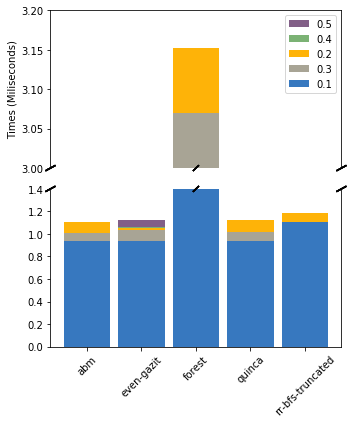

In [26]:
draw_all_plot(data, 1000, 'insert_worst_edge', densityValues=[0.5, 0.4, 0.2, 0.3, 0.1], limit=[1.4, 3, 3.2])

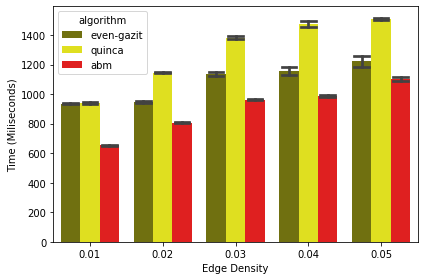

In [27]:
draw_group_plot(data, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

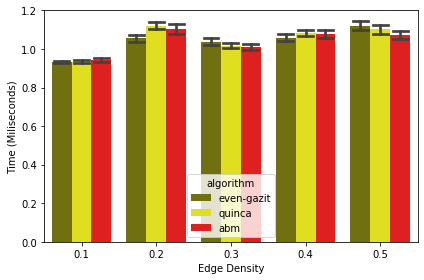

In [28]:
draw_group_plot(data, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Worst Edge (2.000 nodes)

                  time
density               
0.01      33823.127767
0.02      55973.670281
0.03      83217.381883
0.04          7.071877
0.05     133583.799857
0.10          7.472119
0.20          5.947213
0.30          5.530882
0.40          5.681243
0.50          7.935599


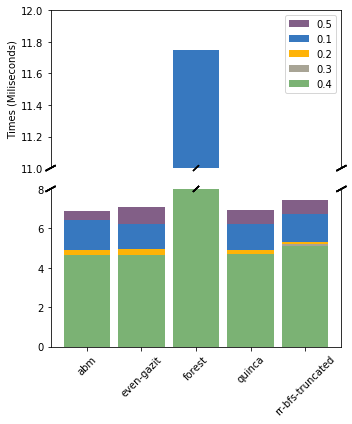

In [152]:
draw_all_plot(data, 2000, 'insert_worst_edge', densityValues=[0.5, 0.1, 0.2, 0.3, 0.4], limit=[8, 11, 12])

                  time
density               
0.01      33823.127767
0.02      55973.670281
0.03      83217.381883
0.04          7.071877
0.05     133583.799857
0.10          7.472119
0.20          5.947213
0.30          5.530882
0.40          5.681243
0.50          7.935599


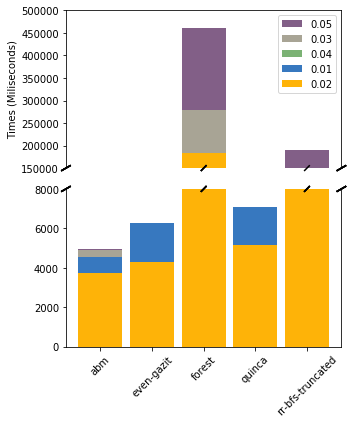

In [153]:
draw_all_plot(data, 2000, 'insert_worst_edge', densityValues=[0.05, 0.03, 0.04, 0.01, 0.02], limit=[8000, 150000, 500000])

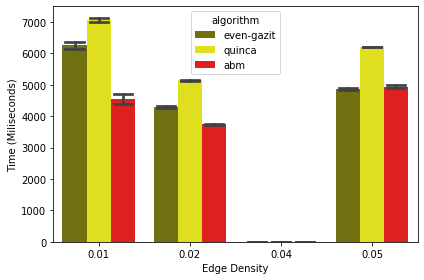

In [30]:
draw_group_plot(data, 2000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.31, 0.04, 0.05])

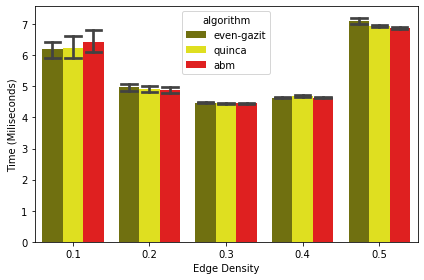

In [31]:
draw_group_plot(data, 2000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Decrease Random Edge (100 nodes)

    algorithm      time  nodes  edges  density           type
90        abm  0.858545    100     87     0.01  decrease_edge
91        abm  0.827312    100     87     0.01  decrease_edge
92        abm  0.842333    100     87     0.01  decrease_edge
93        abm  0.825644    100     87     0.01  decrease_edge
94        abm  0.827074    100     87     0.01  decrease_edge
95        abm  0.833750    100     87     0.01  decrease_edge
96        abm  0.845194    100     87     0.01  decrease_edge
97        abm  0.847578    100     87     0.01  decrease_edge
98        abm  0.830650    100     87     0.01  decrease_edge
99        abm  0.827312    100     87     0.01  decrease_edge
100       abm  0.836372    100     87     0.01  decrease_edge
101       abm  0.835419    100     87     0.01  decrease_edge
102       abm  0.859499    100     87     0.01  decrease_edge
103       abm  0.833988    100     87     0.01  decrease_edge
104       abm  0.826359    100     87     0.01  decrease_edge
105     

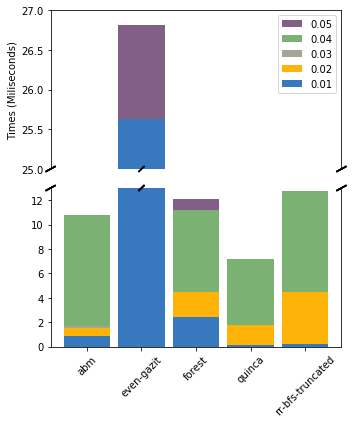

In [32]:
draw_all_plot(data, 100, 'decrease_edge', densityValues=[0.05, 0.04, 0.03, 0.02, 0.01], limit=[13, 25, 27])

    algorithm      time  nodes  edges  density           type
90        abm  0.858545    100     87     0.01  decrease_edge
91        abm  0.827312    100     87     0.01  decrease_edge
92        abm  0.842333    100     87     0.01  decrease_edge
93        abm  0.825644    100     87     0.01  decrease_edge
94        abm  0.827074    100     87     0.01  decrease_edge
95        abm  0.833750    100     87     0.01  decrease_edge
96        abm  0.845194    100     87     0.01  decrease_edge
97        abm  0.847578    100     87     0.01  decrease_edge
98        abm  0.830650    100     87     0.01  decrease_edge
99        abm  0.827312    100     87     0.01  decrease_edge
100       abm  0.836372    100     87     0.01  decrease_edge
101       abm  0.835419    100     87     0.01  decrease_edge
102       abm  0.859499    100     87     0.01  decrease_edge
103       abm  0.833988    100     87     0.01  decrease_edge
104       abm  0.826359    100     87     0.01  decrease_edge
105     

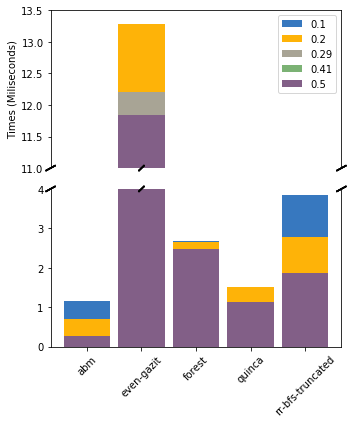

In [33]:
draw_all_plot(data, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5], limit=[4, 11, 13.5])

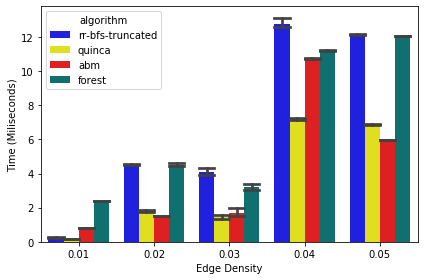

In [174]:
draw_group_plot(data, 100, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], fasterNum=4)

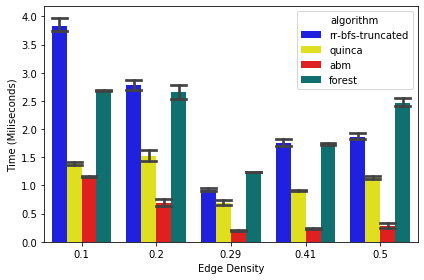

In [173]:
draw_group_plot(data, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5], fasterNum=4)

# Decrease Random Edge (1.000 nodes)

               time
density            
0.01     195.529410
0.02     198.588765
0.03     184.389583
0.04     190.381567
0.05     195.074056
0.10     253.974438
0.20     264.533310
0.30     254.999601
0.40     253.551199
0.50     246.442679


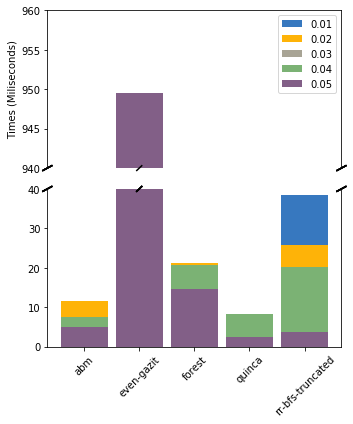

In [155]:
draw_all_plot(data, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], limit=[40, 940, 960])

    algorithm      time  nodes  edges  density           type
90        abm  9.391308   1000   9997     0.01  decrease_edge
91        abm  9.524822   1000   9997     0.01  decrease_edge
92        abm  9.513378   1000   9997     0.01  decrease_edge
93        abm  9.344101   1000   9997     0.01  decrease_edge
94        abm  9.166956   1000   9997     0.01  decrease_edge
95        abm  9.109497   1000   9997     0.01  decrease_edge
96        abm  9.130716   1000   9997     0.01  decrease_edge
97        abm  9.106874   1000   9997     0.01  decrease_edge
98        abm  8.955479   1000   9997     0.01  decrease_edge
99        abm  8.932114   1000   9997     0.01  decrease_edge
100       abm  9.448051   1000   9997     0.01  decrease_edge
101       abm  9.055614   1000   9997     0.01  decrease_edge
102       abm  8.924484   1000   9997     0.01  decrease_edge
103       abm  9.037971   1000   9997     0.01  decrease_edge
104       abm  9.299517   1000   9997     0.01  decrease_edge
105     

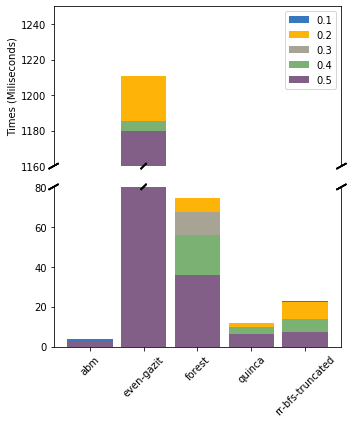

In [37]:
draw_all_plot(data, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], limit=[80, 1160, 1250])

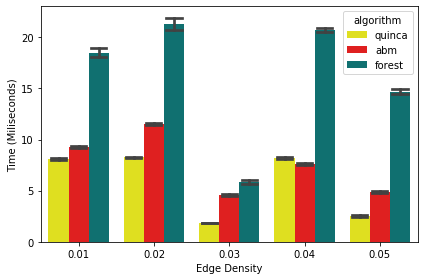

In [38]:
draw_group_plot(data, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

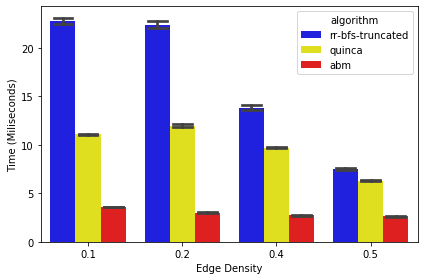

In [39]:
draw_group_plot(data, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.4, 0.4, 0.5])

## Decrease Edge (2.000)

                time
density             
0.01     1533.245845
0.02     1311.805366
0.03     2091.057053
0.04     1406.094467
0.05     1591.446201
0.10     1065.708338
0.20     1066.756802
0.30     1099.189231
0.40     1039.336623
0.50     1028.076410


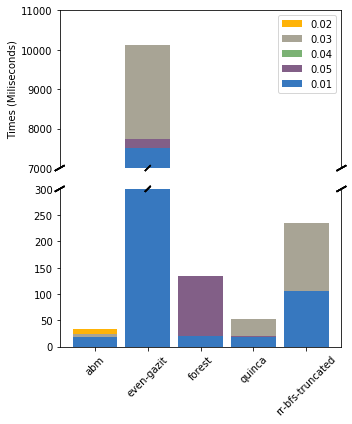

In [161]:
draw_all_plot(data, 2000, 'decrease_edge', densityValues=[0.02, 0.03, 0.04, 0.05, 0.01], limit=[300, 7000, 11000])

                time
density             
0.01     1533.245845
0.02     1311.805366
0.03     2091.057053
0.04     1406.094467
0.05     1591.446201
0.10     1065.708338
0.20     1066.756802
0.30     1099.189231
0.40     1039.336623
0.50     1028.076410


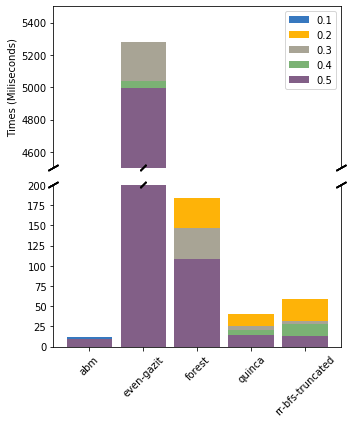

In [164]:
draw_all_plot(data, 2000, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], limit=[200, 4500, 5500])

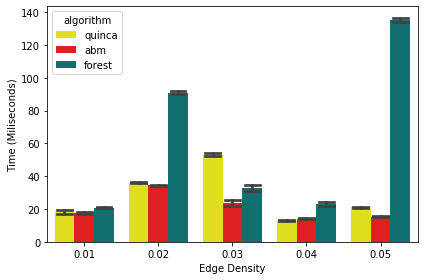

In [165]:
draw_group_plot(data, 2000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

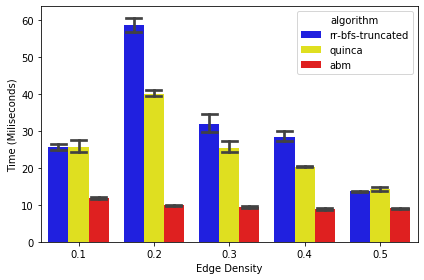

In [166]:
draw_group_plot(data, 2000, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Decrease Worst Edge (100 nodes)

Empty DataFrame
Columns: [algorithm, time, nodes, edges, density, type]
Index: []
               time
density            
0.10      64.130529
0.20     111.827401
0.29     173.029044
0.39     243.176503
0.50     292.901169


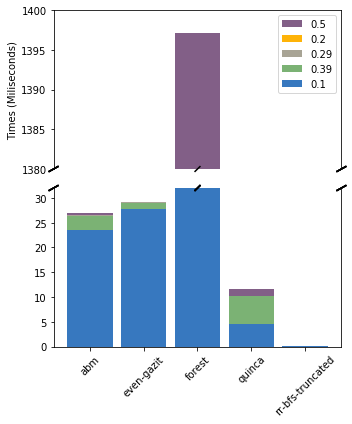

In [40]:
draw_all_plot(data, 100, 'decrease_worst_edge', densityValues=[0.5, 0.2, 0.29, 0.39, 0.1], limit=[32, 1380, 1400])

--------------------------------------------------------------------------------
# Experiments Generating random

### Create 10 graphs and generate results, try 20 times.

In [41]:
data_random = read_files('../lab/results_many_random')

## Insert Random Edge (100 Nodes)

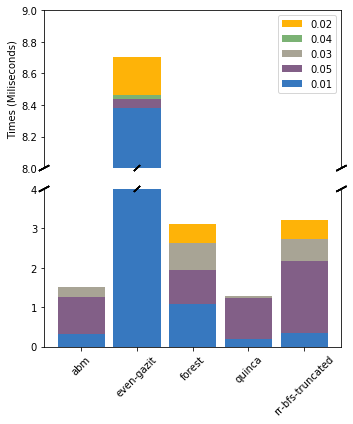

In [60]:
draw_all_plot(data_random, 100, 'insert_edge', densityValues=[0.02, 0.04, 0.03, 0.05, 0.01], generating=2, limit=[4, 8, 9])

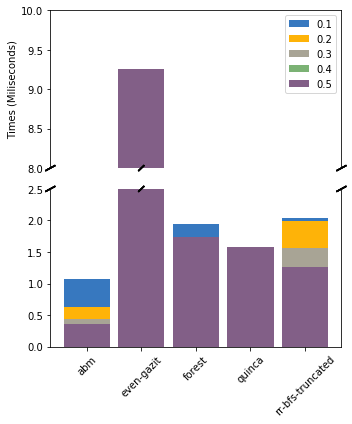

In [61]:
draw_all_plot(data_random, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, limit=[2.5, 8, 10])

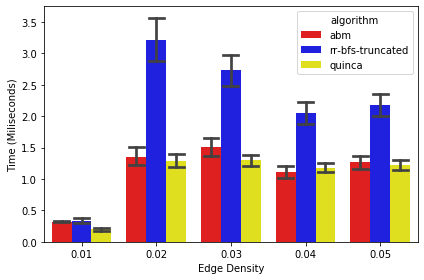

In [62]:
draw_group_plot(data_random, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

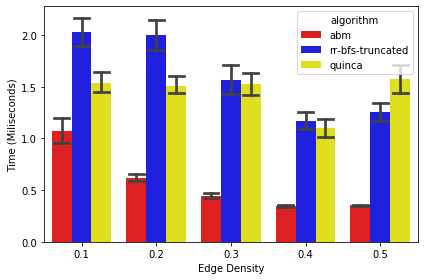

In [63]:
draw_group_plot(data_random, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Decrease Random Edge

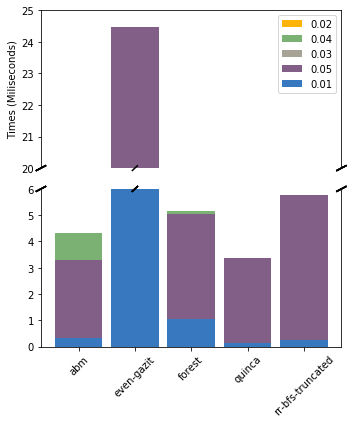

In [67]:
draw_all_plot(data_random, 100, 'decrease_edge', densityValues=[0.02, 0.04, 0.03, 0.05, 0.01], generating=2, limit=[6, 20, 25])

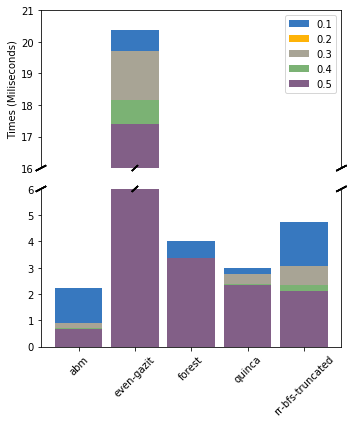

In [69]:
draw_all_plot(data_random, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, limit=[6, 16, 21])

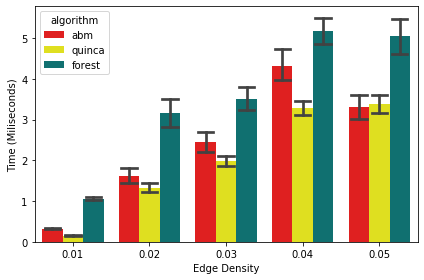

In [70]:
draw_group_plot(data_random, 100, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

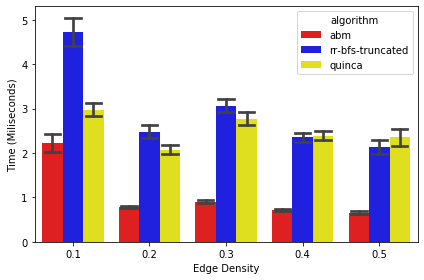

In [71]:
draw_group_plot(data_random, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Decrease Worst Edge

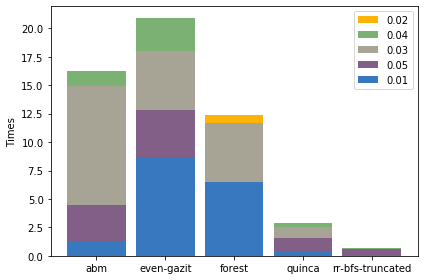

In [73]:
draw_all_plot(data_random, 100, 'decrease_worst_edge', densityValues=[0.02, 0.04, 0.03, 0.05, 0.01], generating=2)

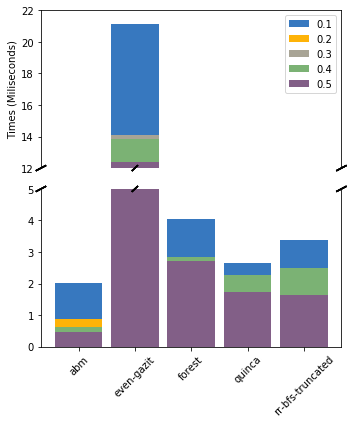

In [75]:
draw_all_plot(data_random, 100, 'decrease_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, limit=[5, 12, 22])

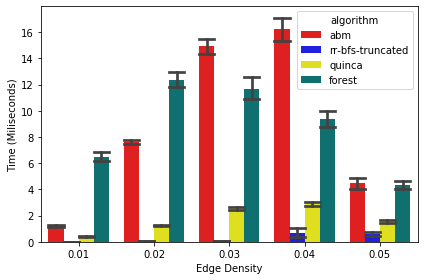

In [77]:
draw_group_plot(data_random, 100, 'decrease_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, fasterNum=4)

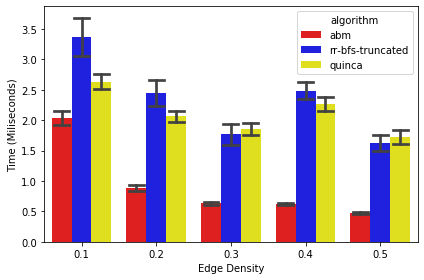

In [79]:
draw_group_plot(data_random, 100, 'decrease_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Insert Random Edge (1.000 Nodes)

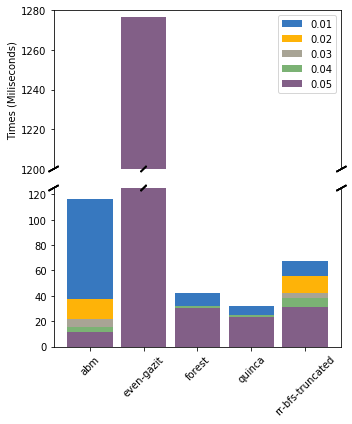

In [82]:
draw_all_plot(data_random, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, limit=[125, 1200, 1280])

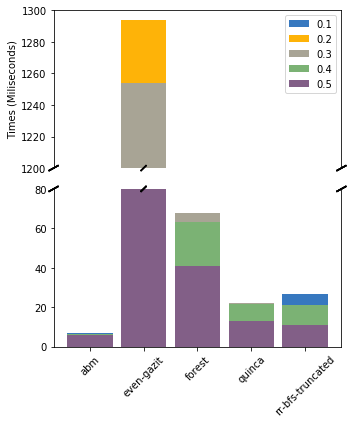

In [86]:
draw_all_plot(data_random, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, limit=[80, 1200, 1300])

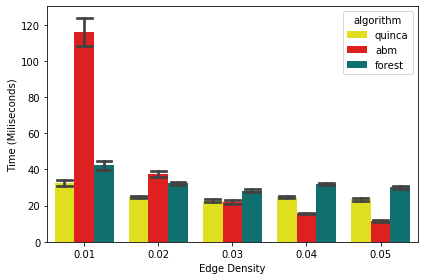

In [48]:
draw_group_plot(data_random, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

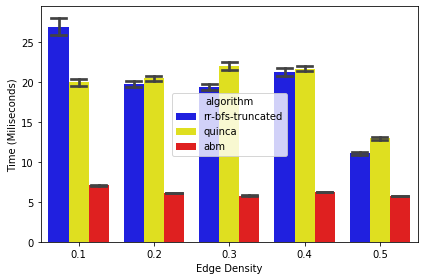

In [49]:
draw_group_plot(data_random, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

                time
density             
0.01     1123.547461


ValueError: shape mismatch: objects cannot be broadcast to a single shape

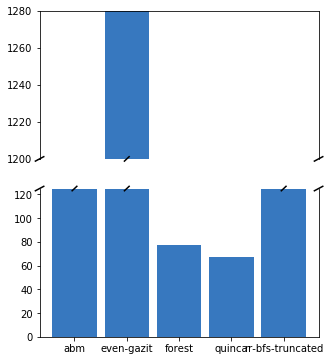

In [167]:
draw_all_plot(data_random, 2000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, limit=[125, 1200, 1280])

## Insert Worst Edge (100 Nodes)

In [50]:
data_random = read_files('../lab/results_many_random')

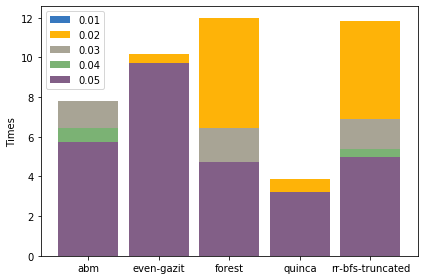

In [99]:
draw_all_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

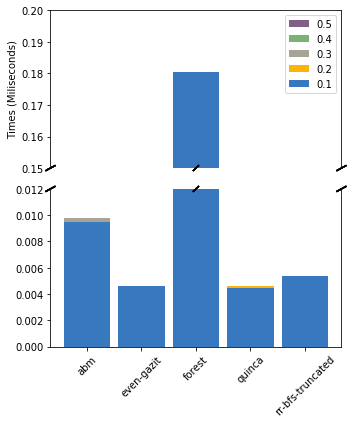

In [101]:
draw_all_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.5, 0.4, 0.3, 0.2, 0.1], generating=2, limit=[0.012, 0.150, 0.2])

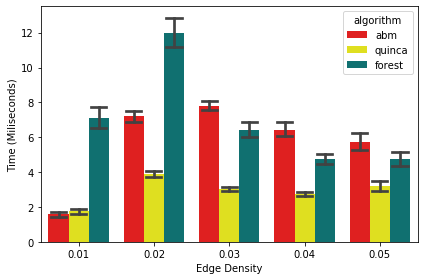

In [102]:
draw_group_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

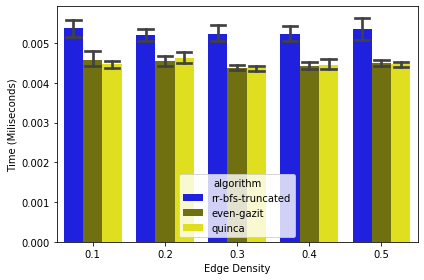

In [103]:
draw_group_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Insert Worst Edge (1.000 Nodes)

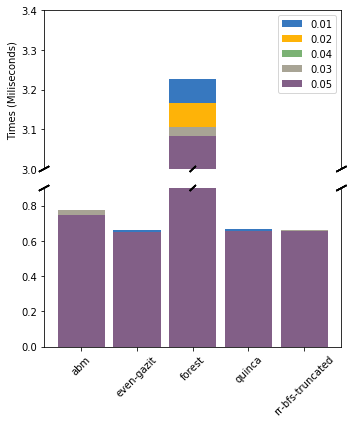

In [104]:
data_random = read_files('../lab/results_many_random')
draw_all_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.04, 0.03, 0.05], generating=2, limit=[0.9, 3, 3.4])

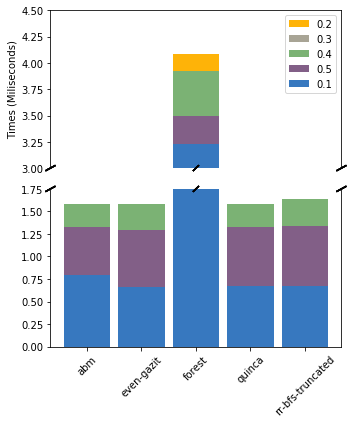

In [105]:
draw_all_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.2, 0.3, 0.4, 0.5, 0.1], generating=2, limit=[1.75, 3, 4.5])

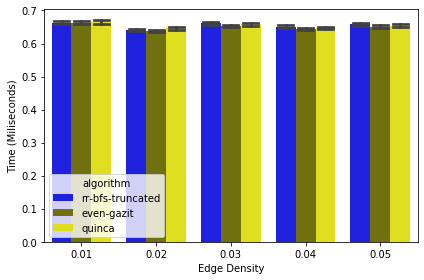

In [57]:
draw_group_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

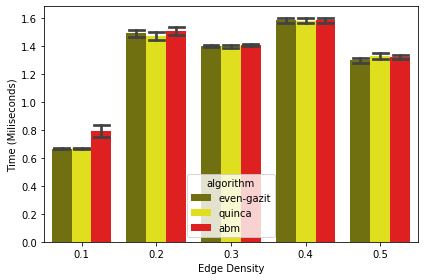

In [58]:
draw_group_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

### Insert Worst Edge (2000)

                time
density             
0.01     1123.547461


ValueError: shape mismatch: objects cannot be broadcast to a single shape

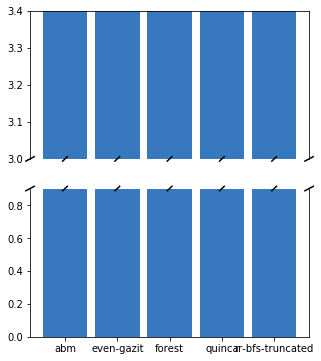

In [170]:
draw_all_plot(data_random, 2000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.04, 0.03, 0.05], generating=2, limit=[0.9, 3, 3.4])

## Decrease Edge

               time
density            
0.01     316.709700
0.02     289.455402
0.03     276.226113
0.04     278.839315
0.05     275.586496
0.10     271.055566
0.20     285.884917
0.30     245.351228
0.40     239.987259
0.50     230.841736


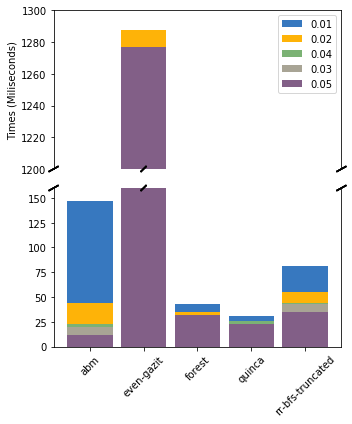

In [28]:
data_random = read_files('../lab/results_many_random')

draw_all_plot(data_random, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.04, 0.03, 0.05], generating=2, limit=[160, 1200, 1300])

               time
density            
0.01     316.709700
0.02     289.455402
0.03     276.226113
0.04     278.839315
0.05     275.586496
0.10     271.055566
0.20     285.884917
0.30     245.351228
0.40     239.987259
0.50     230.841736


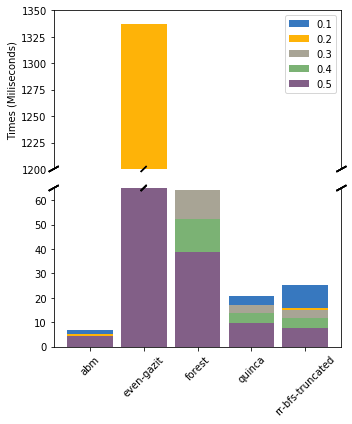

In [29]:
draw_all_plot(data_random, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, limit=[65, 1200, 1350])

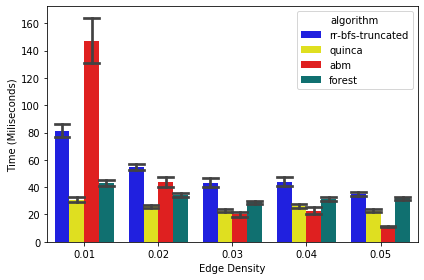

In [30]:
draw_group_plot(data_random, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, fasterNum=4)

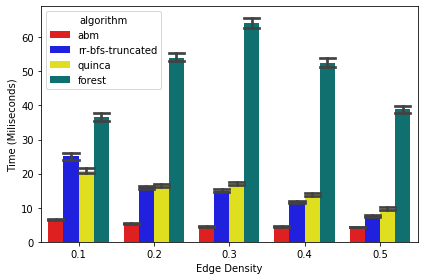

In [31]:
draw_group_plot(data_random, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, fasterNum=4)

## Decrease Worst Edge

               time
density            
0.01     308.754982
0.02     273.083804
0.03     272.720685
0.04     271.842905
0.05     270.355909


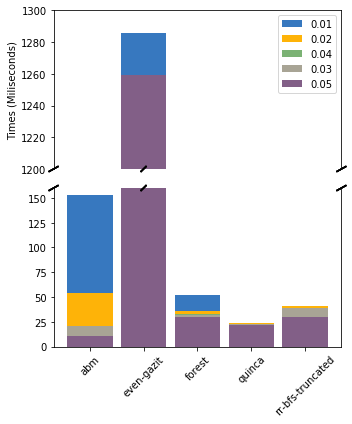

In [129]:
draw_all_plot(data_random, 1000, 'decrease_worst_edge', densityValues=[0.01, 0.02, 0.04, 0.03, 0.05], generating=2, limit=[160, 1200, 1300])

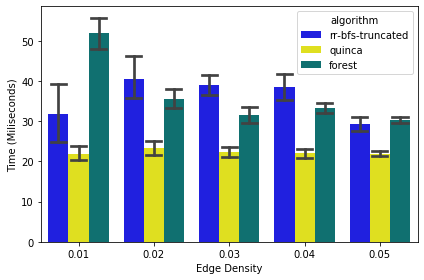

In [131]:
draw_group_plot(data_random, 1000, 'decrease_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)